In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5MB 33kB/s 
     |████████████████████████████████| 412.3MB 44kB/s 
     |████████████████████████████████| 245kB 48.0MB/s 
     |████████████████████████████████| 174kB 50.8MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 3.8MB 49.1MB/s 
     |████████████████████████████████| 512kB 42.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=c84939441fd27cad22337d35002fea3249eeb271f56fa09df3f38541b88c1bcd
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorfl

In [ ]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/HVBTF.csv')

In [ ]:
print(df.head())

       Date  Open  High   Low  Close  Adj Close  Volume
0  4/3/2020  0.14  0.16  0.13   0.14       0.14  612000
1  4/6/2020  0.15  0.17  0.15   0.17       0.17  850100
2  4/7/2020  0.16  0.19  0.16   0.17       0.17  749000
3  4/8/2020  0.18  0.18  0.16   0.17       0.17  476600
4  4/9/2020  0.17  0.18  0.16   0.17       0.17  917500


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)

In [ ]:
env.signal_features

array([[ 0.14,  0.  ],
       [ 0.17,  0.03],
       [ 0.17,  0.  ],
       [ 0.17,  0.  ],
       [ 0.17,  0.  ],
       [ 0.15, -0.02],
       [ 0.16,  0.01],
       [ 0.16,  0.  ],
       [ 0.16,  0.  ],
       [ 0.17,  0.01],
       [ 0.18,  0.01],
       [ 0.18,  0.  ],
       [ 0.19,  0.01],
       [ 0.22,  0.03],
       [ 0.23,  0.01],
       [ 0.24,  0.01],
       [ 0.24,  0.  ],
       [ 0.29,  0.05],
       [ 0.28, -0.01],
       [ 0.26, -0.02],
       [ 0.25, -0.01],
       [ 0.25,  0.  ],
       [ 0.27,  0.02],
       [ 0.31,  0.04],
       [ 0.33,  0.02],
       [ 0.28, -0.05],
       [ 0.3 ,  0.02],
       [ 0.3 ,  0.  ],
       [ 0.3 ,  0.  ],
       [ 0.27, -0.03],
       [ 0.27,  0.  ],
       [ 0.28,  0.01],
       [ 0.28,  0.  ],
       [ 0.26, -0.02],
       [ 0.26,  0.  ],
       [ 0.25, -0.01],
       [ 0.26,  0.01],
       [ 0.27,  0.01],
       [ 0.27,  0.  ],
       [ 0.28,  0.01],
       [ 0.3 ,  0.02],
       [ 0.3 ,  0.  ],
       [ 0.3 ,  0.  ],
       [ 0.

info {'total_reward': 1.4799999999999998, 'total_profit': 3.005620358866497, 'position': 0}


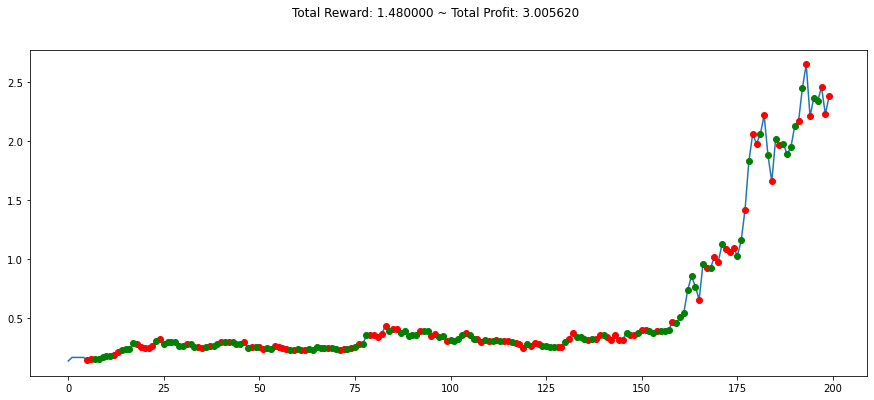

In [ ]:
#building envir.

state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info",info)
    break
  
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()
#total profit: 200%

In [ ]:
#adding custom indicators - have to download finta
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA #technical analysis library

In [ ]:
df['SMA'] = TA.SMA(df,12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df['VPT'] = TA.VPT(df)

df.head()
df.fillna(0, inplace = True) #shouldn't cause trouble for model

In [ ]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV,VPT
0,2020-04-03,0.14,0.16,0.13,0.14,0.14,612000,0.000000,0.000000,0.0,0.000000e+00
1,2020-04-06,0.15,0.17,0.15,0.17,0.17,850100,0.000000,100.000000,850100.0,1.700200e+06
2,2020-04-07,0.16,0.19,0.16,0.17,0.17,749000,0.000000,100.000000,0.0,2.199533e+06
3,2020-04-08,0.18,0.18,0.16,0.17,0.17,476600,0.000000,100.000000,0.0,1.722933e+06
4,2020-04-09,0.17,0.18,0.16,0.17,0.17,917500,0.000000,100.000000,0.0,1.722933e+06
5,2020-04-13,0.17,0.17,0.15,0.15,0.15,1277000,0.000000,52.723133,-426900.0,-8.310667e+05
6,2020-04-14,0.16,0.17,0.15,0.16,0.16,1239100,0.000000,62.316211,812200.0,-8.310667e+05
7,2020-04-15,0.17,0.17,0.15,0.16,0.16,341700,0.000000,62.316211,0.0,-1.172767e+06
8,2020-04-16,0.14,0.17,0.14,0.16,0.16,387700,0.000000,62.316211,0.0,-6.558333e+05
9,2020-04-17,0.18,0.18,0.16,0.17,0.17,644600,0.000000,69.935539,1456800.0,-1.300433e+06


In [ ]:
#create new envir.

def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV','VPT']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

env2.prices

array([0.13, 0.15, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.14, 0.16, 0.17,
       0.17, 0.17, 0.16, 0.21, 0.22, 0.23, 0.25, 0.25, 0.25, 0.23, 0.24,
       0.25, 0.28, 0.31, 0.24, 0.28, 0.28, 0.29, 0.27, 0.26, 0.25, 0.27,
       0.24, 0.24, 0.24, 0.24, 0.26, 0.26, 0.25, 0.28, 0.28, 0.29, 0.28,
       0.28, 0.27, 0.28, 0.24, 0.23, 0.22])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV,VPT
0,2020-04-03,0.14,0.16,0.13,0.14,0.14,612000,0.0,0.0,0.0,0.000000e+00
1,2020-04-06,0.15,0.17,0.15,0.17,0.17,850100,0.0,100.0,850100.0,1.700200e+06
2,2020-04-07,0.16,0.19,0.16,0.17,0.17,749000,0.0,100.0,0.0,2.199533e+06
3,2020-04-08,0.18,0.18,0.16,0.17,0.17,476600,0.0,100.0,0.0,1.722933e+06
4,2020-04-09,0.17,0.18,0.16,0.17,0.17,917500,0.0,100.0,0.0,1.722933e+06


In [ ]:
env_maker = lambda:env2
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy',env, verbose =1) #training algo
model.learn(total_timesteps=30000)

---------------------------------
| explained_variance | -155     |
| fps                | 20       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 0.00488  |
---------------------------------
----------------------------------
| explained_variance | -1.25e+03 |
| fps                | 316       |
| nupdates           | 100       |
| policy_entropy     | 0.693     |
| total_timesteps    | 500       |
| value_loss         | 0.00432   |
----------------------------------
---------------------------------
| explained_variance | -2.05    |
| fps                | 342      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 0.00218  |
---------------------------------
---------------------------------
| explained_variance | -12.8    |
| fps                | 352      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| tota

In [ ]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,200))
obs = env.reset()
while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs,rewards,done,info = env.step(action)
  if done:
    print("info",info)
    break

info {'total_reward': 0.25999999999999995, 'total_profit': 1.1631714771757733, 'position': 0}


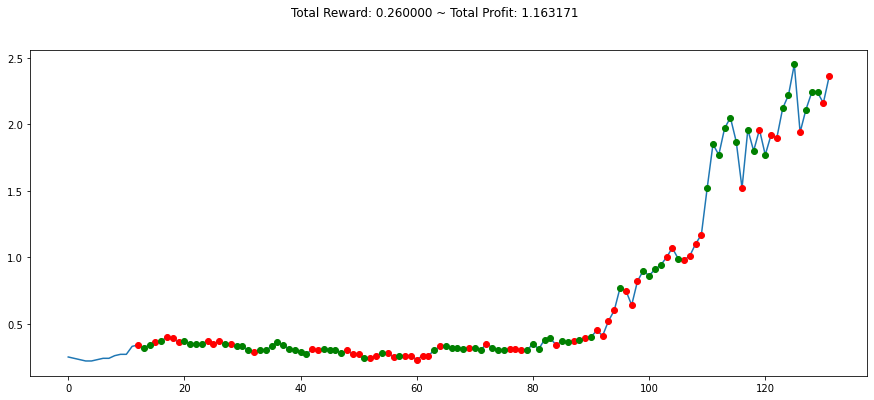

In [ ]:

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()